In [1]:
import numpy as np

In [2]:
def formData(series,timestep):
    X = []
    y = []
    for i in range(0,len(series) - timestep):
        X.append(series[i:i+timestep])
        y.append(series[i+timestep])
    return np.array(X),np.array(y)

In [3]:
X,y = formData(np.linspace(1,np.pi,num = 1000),4)

In [4]:
for i,j in zip(X,y):
    print(i,j)

[1.         1.00214374 1.00428747 1.00643121] 1.0085749455599191
[1.00214374 1.00428747 1.00643121 1.00857495] 1.0107186819498988
[1.00428747 1.00643121 1.00857495 1.01071868] 1.0128624183398787
[1.00643121 1.00857495 1.01071868 1.01286242] 1.0150061547298583
[1.00857495 1.01071868 1.01286242 1.01500615] 1.0171498911198382
[1.01071868 1.01286242 1.01500615 1.01714989] 1.019293627509818
[1.01286242 1.01500615 1.01714989 1.01929363] 1.0214373638997978
[1.01500615 1.01714989 1.01929363 1.02143736] 1.0235811002897774
[1.01714989 1.01929363 1.02143736 1.0235811 ] 1.0257248366797573
[1.01929363 1.02143736 1.0235811  1.02572484] 1.027868573069737
[1.02143736 1.0235811  1.02572484 1.02786857] 1.030012309459717
[1.0235811  1.02572484 1.02786857 1.03001231] 1.0321560458496966
[1.02572484 1.02786857 1.03001231 1.03215605] 1.0342997822396764
[1.02786857 1.03001231 1.03215605 1.03429978] 1.0364435186296561
[1.03001231 1.03215605 1.03429978 1.03644352] 1.038587255019636
[1.03215605 1.03429978 1.0364

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
print(X.shape)
print(y.shape)

(996, 4)
(996,)


In [7]:
inp = X.reshape(X.shape[0],X.shape[1],1)

In [8]:
inp.shape

(996, 4, 1)

In [9]:
model = Sequential()
model.add(layers.SimpleRNN(units=32,input_shape = (4,1)))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(1))

In [10]:
model.compile(optimizer = "sgd",loss = "mse")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inp,y,test_size=0.15,random_state=20)

In [13]:
network = model.fit(X_train,y_train,epochs = 200)

Epoch 1/200
27/27 [==============================] - 1s 2ms/step - loss: 0.2774
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/200
27/27 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 8.6176e-04
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 7.8890e-04
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 7.4092e-04
Epoch 11/200
27/27 [==============================] - 0s 2ms/step - loss: 7.0597e-04
Epoch 12/200
27/27 [==============================] - 0s 2ms/step - loss: 6.5692e-04
Epoch 13/200
27/2

27/27 [==============================] - 0s 2ms/step - loss: 1.0225e-04
Epoch 98/200
27/27 [==============================] - 0s 2ms/step - loss: 1.0064e-04
Epoch 99/200
27/27 [==============================] - 0s 1ms/step - loss: 1.0030e-04
Epoch 100/200
27/27 [==============================] - 0s 2ms/step - loss: 9.9772e-05
Epoch 101/200
27/27 [==============================] - 0s 2ms/step - loss: 9.8531e-05
Epoch 102/200
27/27 [==============================] - 0s 2ms/step - loss: 9.9062e-05
Epoch 103/200
27/27 [==============================] - 0s 2ms/step - loss: 9.7771e-05
Epoch 104/200
27/27 [==============================] - 0s 1ms/step - loss: 9.7129e-05
Epoch 105/200
27/27 [==============================] - 0s 2ms/step - loss: 9.8017e-05
Epoch 106/200
27/27 [==============================] - 0s 2ms/step - loss: 9.8395e-05
Epoch 107/200
27/27 [==============================] - 0s 2ms/step - loss: 9.7864e-05
Epoch 108/200
27/27 [==============================] - 0s 3ms/step - l

27/27 [==============================] - 0s 2ms/step - loss: 6.8391e-05
Epoch 193/200
27/27 [==============================] - 0s 1ms/step - loss: 6.7901e-05
Epoch 194/200
27/27 [==============================] - 0s 2ms/step - loss: 6.8291e-05
Epoch 195/200
27/27 [==============================] - 0s 2ms/step - loss: 6.9400e-05
Epoch 196/200
27/27 [==============================] - 0s 2ms/step - loss: 6.9442e-05
Epoch 197/200
27/27 [==============================] - 0s 2ms/step - loss: 6.9139e-05
Epoch 198/200
27/27 [==============================] - 0s 2ms/step - loss: 6.7841e-05
Epoch 199/200
27/27 [==============================] - 0s 2ms/step - loss: 6.7804e-05
Epoch 200/200
27/27 [==============================] - 0s 3ms/step - loss: 6.8019e-05


In [14]:
train_score = model.evaluate(X_train,y_train)
print(train_score)

27/27 [==============================] - 0s 1ms/step - loss: 6.5599e-05
6.559884786838666e-05


In [15]:
pred = model.predict(X_test)

In [16]:
for actual,predicted in zip(y_test,pred):
    print(f"Actual: {actual}\tPredicted:{predicted[0]}")

Actual: 1.668845753673689	Predicted:1.660408854484558
Actual: 2.764295048953353	Predicted:2.7721400260925293
Actual: 3.0151122065809863	Predicted:3.0062408447265625
Actual: 2.0311372035802706	Predicted:2.028553009033203
Actual: 2.9014941779120584	Predicted:2.902254581451416
Actual: 2.0418558855301696	Predicted:2.0395965576171875
Actual: 1.4266035416059748	Predicted:1.4222993850708008
Actual: 1.988262475780675	Predicted:1.9844348430633545
Actual: 1.0514496733595144	Predicted:1.0635312795639038
Actual: 2.828607140652746	Predicted:2.833707094192505
Actual: 1.9968374213405942	Predicted:1.9932509660720825
Actual: 3.0729930891104402	Predicted:3.0577635765075684
Actual: 2.0397121491401897	Predicted:2.0373873710632324
Actual: 1.585240034464478	Predicted:1.5774255990982056
Actual: 2.121174131959421	Predicted:2.1214370727539062
Actual: 2.1383240230792593	Predicted:2.1391501426696777
Actual: 2.837182086212665	Predicted:2.841841459274292
Actual: 2.7557201033934335	Predicted:2.7638590335845947
Actu

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

5.2766148071720097e-05


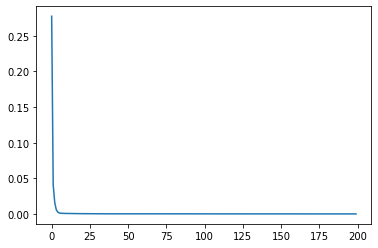

In [18]:
import matplotlib.pyplot as plt
plt.plot(network.history['loss'])

In [19]:
keras.backend.clear_session()